In [1]:
# 导入所需库  
import pandas as pd  
import numpy as np  
from sklearn import datasets  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix  

# 1. 加载数据并划分鸢尾花数据集，训练集比例0.2，随机种子42  
iris = datasets.load_iris()  
X = iris.data  
y = iris.target  

# 划分数据集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# 2. 创建并训练 SVM 模型，使用线性核函数，随机种子42  
# 创建 SVM 模型  
svm_model = SVC(kernel='linear', random_state=42)  

# 训练模型  
svm_model.fit(X_train, y_train)  

# 3. 进行预测  
y_pred = svm_model.predict(X_test)  

# 计算评估指标  
accuracy = accuracy_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' 适用于多分类情况  
f1 = f1_score(y_test, y_pred, average='macro')  

# 计算混淆矩阵  
conf_matrix = confusion_matrix(y_test, y_pred)  

# 输出评估指标  
print("Accuracy:", accuracy)  
print("Recall:", recall)  
print("F1 Score:", f1)  
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
数据集描述: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a 
数据样本: From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Orga

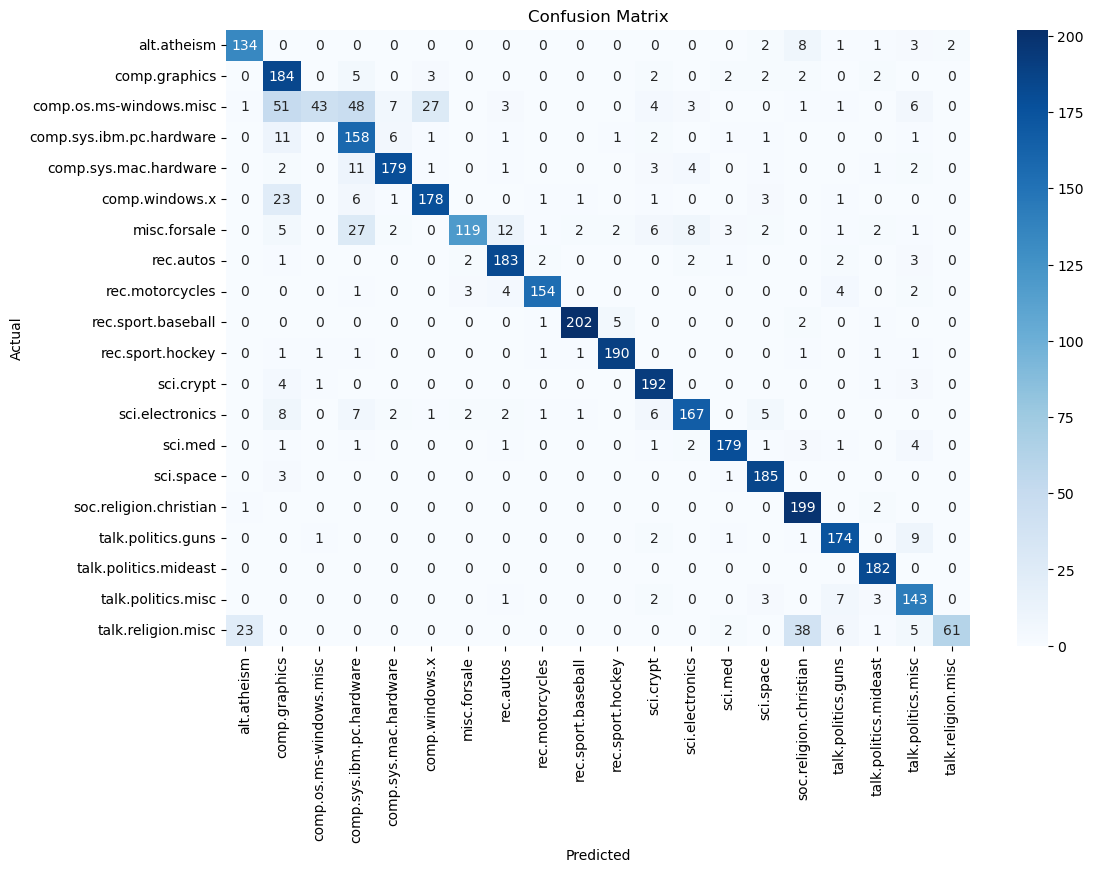

In [2]:
# 导入所需库  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.datasets import fetch_20newsgroups  
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix  

# 1. 导入数据集  
newsgroups = fetch_20newsgroups(subset='all')  # 加载所有类别的数据集  

# 2. 查看类别标签、数据集的描述、数据样本  
print("类别标签:", newsgroups.target_names)  # 打印类别标签  
print("数据集描述:", newsgroups.DESCR[:500])  # 打印数据集描述（取前500个字符）  
print("数据样本:", newsgroups.data[0])  # 打印第一个数据样本  

# 3. 将文本数据转换为词袋模型  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(newsgroups.data)  # 文本转化为词袋模型（特征矩阵）  
y = newsgroups.target  # 标签  

# 4. 划分训练集和测试集，训练集比例0.2，随机种子42  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# 5. 创建并训练朴素贝叶斯分类器  
naive_bayes_model = MultinomialNB()  
naive_bayes_model.fit(X_train, y_train)  # 训练模型  

# 6. 进行预测  
y_pred = naive_bayes_model.predict(X_test)  

# 计算评估指标  
accuracy = accuracy_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' 适用于多分类情况  
f1 = f1_score(y_test, y_pred, average='macro')  

# 输出评估指标  
print("Accuracy:", accuracy)  
print("Recall:", recall)  
print("F1 Score:", f1)  

# 7. 绘制混淆矩阵  
conf_matrix = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(12, 8))  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  
            xticklabels=newsgroups.target_names,  
            yticklabels=newsgroups.target_names)  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.title('Confusion Matrix')  
plt.show()

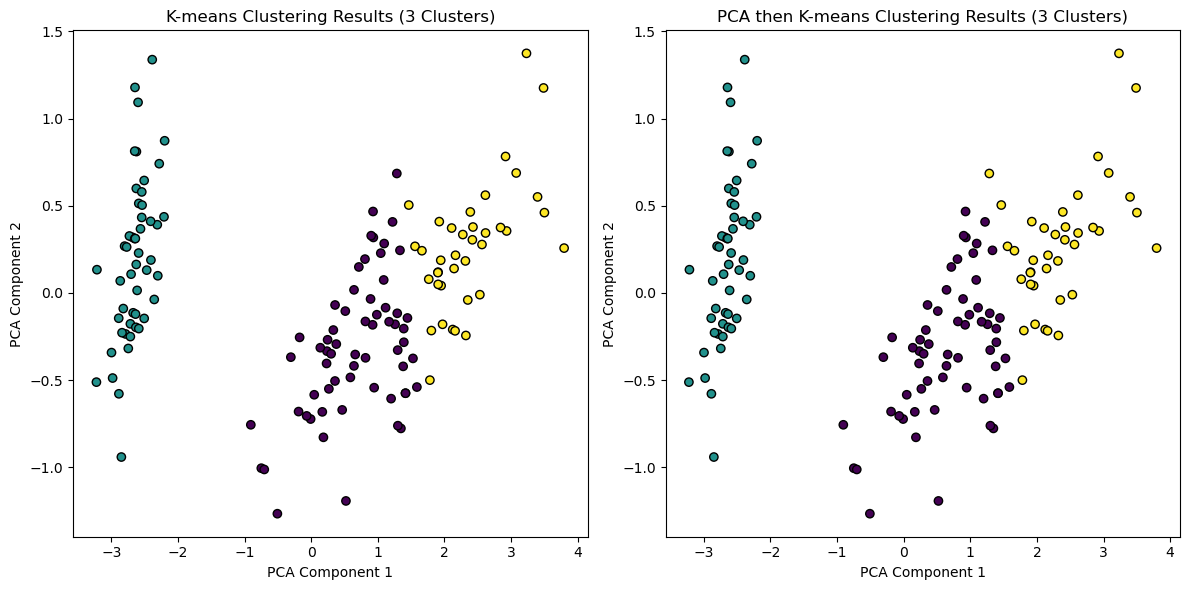

Silhouette Score (K-means on original data): 0.5528
Silhouette Score (K-means on PCA data): 0.5977


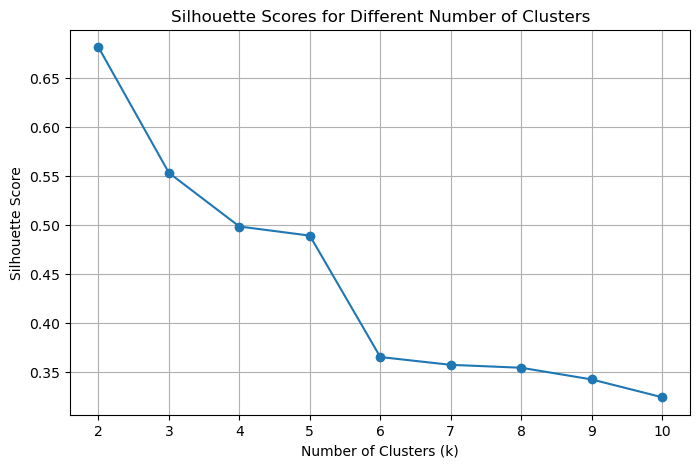

In [12]:
import os  
import warnings  
warnings.filterwarnings("ignore", category=UserWarning)  

# 设置环境变量以避免警告  
os.environ["OMP_NUM_THREADS"] = "1"  

# 导入必要的库  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn import datasets  
from sklearn.cluster import KMeans  
from sklearn.decomposition import PCA  
from sklearn.metrics import silhouette_score  

# 1. 导入鸢尾花数据集  
iris = datasets.load_iris()  
X = iris.data  

# 2. 使用 K-means 聚类，将数据分为 3 个簇，设置随机种子为 0  
kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++', n_init=20)  
kmeans.fit(X)  
labels = kmeans.labels_  

# 3. PCA 降维到 2 维空间后，输出可视化结果  
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X)  

# 可视化 K-means 聚类结果  
plt.figure(figsize=(12, 6))  
plt.subplot(1, 2, 1)  
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')  
plt.title('K-means Clustering Results (3 Clusters)')  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  

# 4. 先降维再聚类  
kmeans_pca = KMeans(n_clusters=3, random_state=0, init='k-means++', n_init=20)  
kmeans_pca.fit(X_pca)  
labels_pca = kmeans_pca.labels_  

# 可视化先降维再聚类的结果  
plt.subplot(1, 2, 2)  
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', marker='o', edgecolor='k')  
plt.title('PCA then K-means Clustering Results (3 Clusters)')  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  

plt.tight_layout()  
plt.show()  

# 5. 使用轮廓系数比较聚类效果  
silhouette_kmeans = silhouette_score(X, labels)  
silhouette_kmeans_pca = silhouette_score(X_pca, labels_pca)  

print(f'Silhouette Score (K-means on original data): {silhouette_kmeans:.4f}')  
print(f'Silhouette Score (K-means on PCA data): {silhouette_kmeans_pca:.4f}')  

# 绘制轮廓系数与聚类数的关系图  
k_values = range(2, 11)  
silhouette_scores = []  

for k in k_values:  
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++', n_init=20)  
    cluster_labels = kmeans.fit_predict(X)  
    score = silhouette_score(X, cluster_labels)  
    silhouette_scores.append(score)  

plt.figure(figsize=(8, 5))  
plt.plot(k_values, silhouette_scores, marker='o')  
plt.title('Silhouette Scores for Different Number of Clusters')  
plt.xlabel('Number of Clusters (k)')  
plt.ylabel('Silhouette Score')  
plt.xticks(k_values)  
plt.grid()  
plt.show()